In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv('BankChurners.csv')
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
ds.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
# The dataset description on Kaggle instructed to delete the last two columns due to irrelevance, hence doing so
# Also deleting the client ID column due to irrelevance

ds.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
ds.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
ds.shape

(10127, 20)

In [6]:
ds.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
ds.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
# Finding out the values of the categorical variables
categorical = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for item in categorical:
    print(ds[item].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [9]:
ds[ds['Education_Level'] == 'Unknown'].shape

(1519, 20)

In [10]:
ds[ds['Marital_Status'] == 'Unknown'].shape

(749, 20)

In [11]:
ds[ds['Income_Category'] == 'Unknown'].shape

(1112, 20)

In [12]:
ds = ds[(ds['Education_Level'] != 'Unknown') & (ds['Income_Category'] != 'Unknown')]
ds.shape 

(7641, 20)

In [13]:
ds.reset_index(inplace=True, drop=True)
ds.head(20)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
7,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
8,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
9,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217


In [14]:
ds['Marital_Status'].replace('Unknown', np.nan, inplace=True)
ds['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [15]:
marital_mode = ds['Marital_Status'].mode()[0]
ds['Marital_Status'].fillna(marital_mode, inplace=True)
ds['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [16]:
# Verifying
categorical = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for item in categorical:
    print(ds[item].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Silver' 'Gold' 'Platinum']


Text(0.5, 1.0, 'Target Variable distribution')

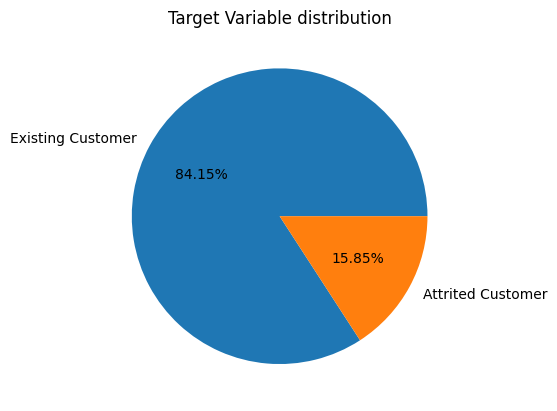

In [17]:
plt.pie(ds['Attrition_Flag'].value_counts(), labels=ds['Attrition_Flag'].unique(), autopct='%.2f%%')
plt.title('Target Variable distribution')

Therefore, dataset is imbalanced.

Text(0.5, 1.0, 'Distribution of customers by education level')

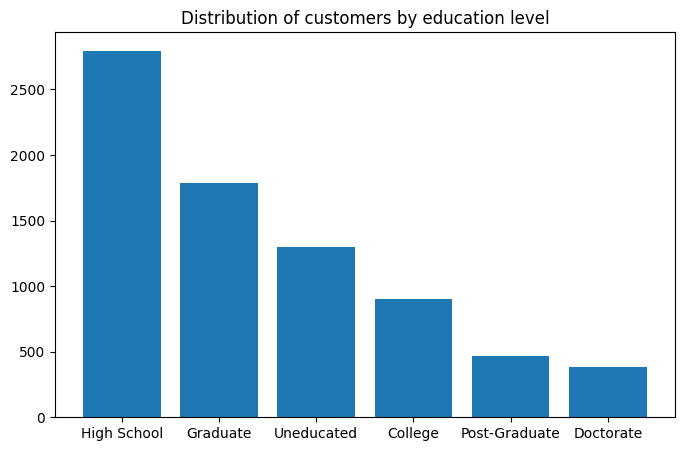

In [18]:
plt.figure(figsize=(8,5))
plt.bar(ds['Education_Level'].unique(), ds['Education_Level'].value_counts())
plt.title("Distribution of customers by education level")

Text(0.5, 1.0, 'Distribution of customers by Income Category')

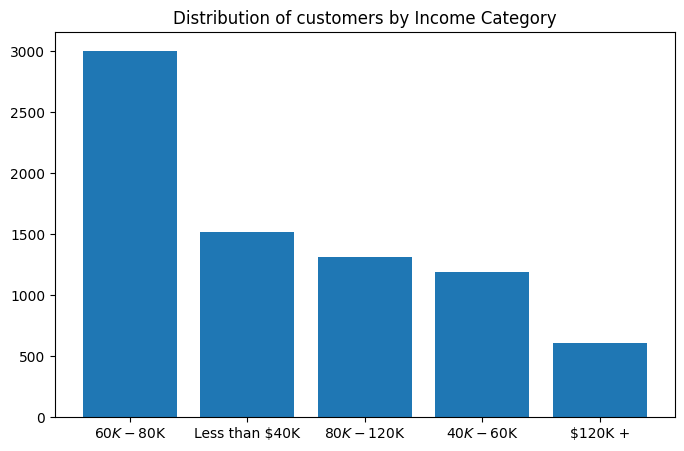

In [19]:
plt.figure(figsize=(8,5))
plt.bar(ds['Income_Category'].unique(), ds['Income_Category'].value_counts())
plt.title("Distribution of customers by Income Category")

Text(0.5, 0, 'Customer Age')

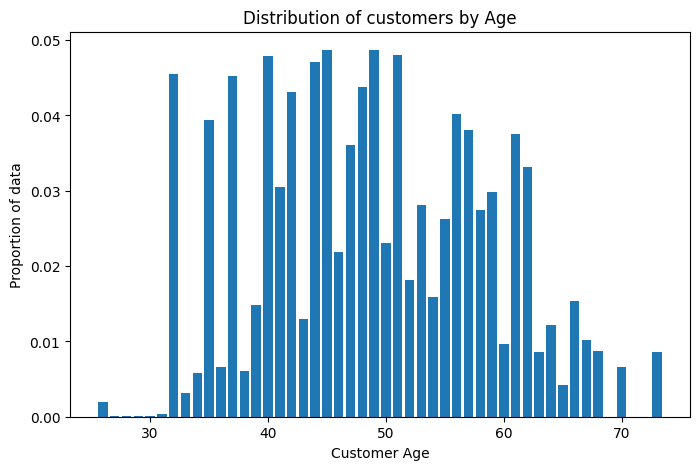

In [20]:
plt.figure(figsize=(8,5))
plt.bar(ds['Customer_Age'].unique(), ds['Customer_Age'].value_counts()/len(ds))
plt.title("Distribution of customers by Age")
plt.ylabel("Proportion of data")
plt.xlabel("Customer Age")

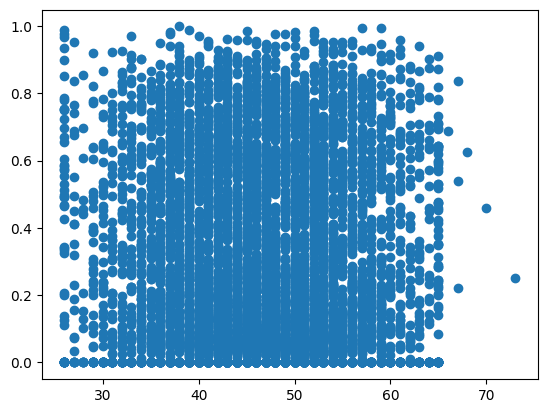

In [21]:
plt.scatter(ds['Customer_Age'], ds['Avg_Utilization_Ratio'])

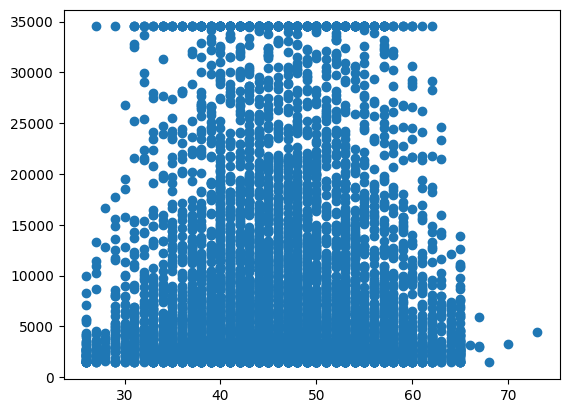

In [22]:
plt.scatter(ds['Customer_Age'], ds['Credit_Limit'])

In [23]:
finalds = pd.get_dummies(ds, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
finalds.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,True,False,False,False
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,True,False,False,False
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,True,False,False,False
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,False,False,True,True,False,False,False
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,True,False,False,False


In [24]:
finalds.dtypes

Attrition_Flag                     object
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_F                             bool
Gender_M                             bool
Education_Level_College              bool
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Marital_Status_Divorced           

In [25]:
Y = np.asanyarray(finalds['Attrition_Flag'])
Y

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Attrited Customer'],
      dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
finalds['Attrition_Flag'] = LabelEncoder().fit_transform(finalds['Attrition_Flag'])
finalds

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,True,False,False,False
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,True,False,False,False
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,True,False,False,False
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,False,False,True,True,False,False,False
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,1,56,1,50,4,1,4,3688.0,606,3082.0,...,True,False,False,False,False,True,True,False,False,False
7637,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,True,False,True,False,False,False,True,False,False,False
7638,0,44,1,36,5,3,4,5409.0,0,5409.0,...,False,False,False,False,False,True,True,False,False,False
7639,0,30,2,36,4,3,3,5281.0,0,5281.0,...,False,False,True,False,False,False,True,False,False,False


Text(0.5, 1.0, 'Correlation Matrix')

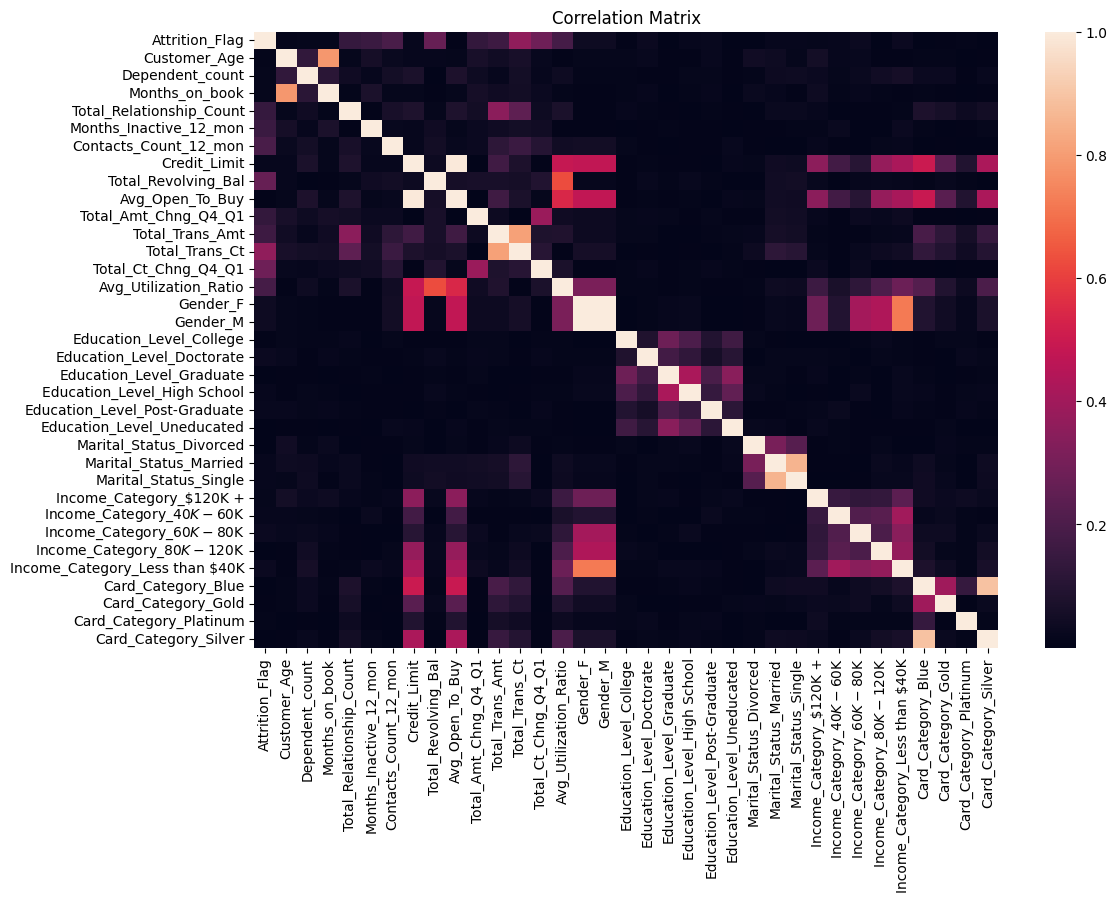

In [27]:
from seaborn import heatmap
plt.figure(figsize=(12,8))
heatmap(finalds.corr().abs())
plt.title("Correlation Matrix")

In [28]:
finalds.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [29]:
relevantX = np.asarray(ds[['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])
relevantX[:2]

array([[5.000e+00, 1.000e+00, 3.000e+00, 7.770e+02, 1.335e+00, 1.144e+03,
        4.200e+01, 1.625e+00, 6.100e-02],
       [6.000e+00, 1.000e+00, 2.000e+00, 8.640e+02, 1.541e+00, 1.291e+03,
        3.300e+01, 3.714e+00, 1.050e-01]])

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(relevantX, Y, test_size=0.3, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5348, 9), (2293, 9), (5348,), (2293,))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

res = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    yhat = knn.predict(xtest)
    res.append(balanced_accuracy_score(ytest, yhat))

Text(0, 0.5, 'balanced accuracy')

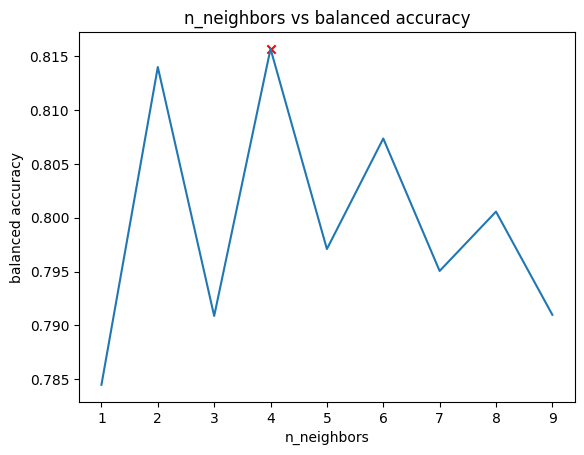

In [32]:
plt.plot(range(1, len(res)+1), res)
plt.scatter(np.argmax(res)+1, max(res), c='r', marker='x')
plt.title("n_neighbors vs balanced accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("balanced accuracy")

In [33]:
max(res), np.argmax(res)+1

(0.81564768274612, 4)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_res = []

for i in range(1, 10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(xtrain, ytrain)
    yhat = tree.predict(xtest)
    dt_res.append(balanced_accuracy_score(ytest, yhat))

Text(0, 0.5, 'balanced accuracy')

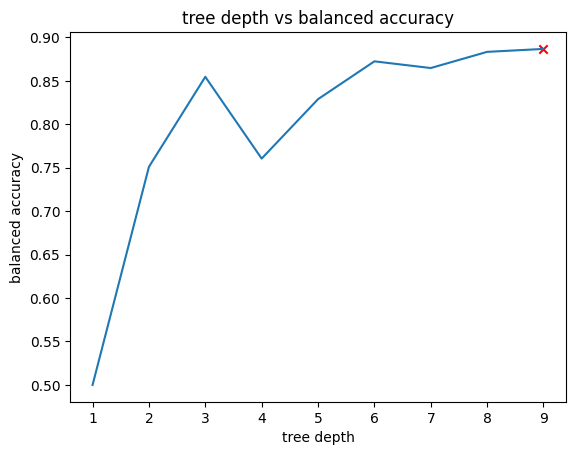

In [35]:
plt.plot(range(1, len(dt_res)+1), dt_res)
plt.scatter(np.argmax(dt_res)+1, max(dt_res), c='r', marker='x')
plt.title("tree depth vs balanced accuracy")
plt.xlabel("tree depth")
plt.ylabel("balanced accuracy")

In [36]:
max(dt_res), np.argmax(dt_res)+1

(0.8867419138825465, 9)

In [38]:
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(criterion='entropy', max_depth=np.argmax(dt_res)+1).fit(xtrain, ytrain)
yhat = tree.predict(xtest)
print(classification_report(ytest, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.83      0.81      0.82       391
Existing Customer       0.96      0.96      0.96      1902

         accuracy                           0.94      2293
        macro avg       0.89      0.89      0.89      2293
     weighted avg       0.94      0.94      0.94      2293



Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

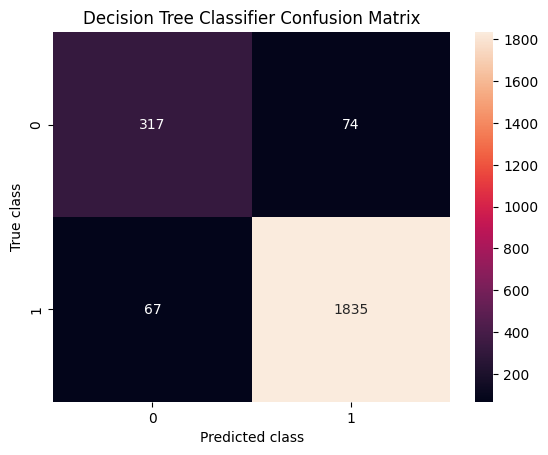

In [51]:
from sklearn.metrics import confusion_matrix
heatmap(confusion_matrix(ytest, yhat), annot=True, fmt='d')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Decision Tree Classifier Confusion Matrix")